In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

import os, shutil
import random
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2023-04-04 17:07:26.536932: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 17:07:26.613514: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-04 17:07:26.634007: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-04 17:07:27.072003: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
negative_dir = "/home/pabloperez/Repositorios/estrabismo/photos/negative"
positive_dir = "/home/pabloperez/Repositorios/estrabismo/photos/positive"
train_dir = os.path.join("/home/pabloperez/Repositorios/estrabismo/ModelSample/train")
validation_dir = os.path.join("/home/pabloperez/Repositorios/estrabismo/ModelSample/validation")

In [ ]:
'''
negative_train_dir = os.path.join(train_dir, "negative")
negative_validation_dir = os.path.join(validation_dir, "negative")
positive_train_dir = os.path.join(train_dir, "positive")
positive_validation_dir = os.path.join(validation_dir, "positive")

os.makedirs(negative_train_dir, exist_ok=True)
os.makedirs(negative_validation_dir, exist_ok=True)
os.makedirs(positive_train_dir, exist_ok=True)
os.makedirs(positive_validation_dir, exist_ok=True)


# Lista de nombres de archivo de las imágenes en los directorios "negative" y "positive"
negative_files = [os.path.join(negative_dir, f) for f in os.listdir(negative_dir) if os.path.isfile(os.path.join(negative_dir, f))]
positive_files = [os.path.join(positive_dir, f) for f in os.listdir(positive_dir) if os.path.isfile(os.path.join(positive_dir, f))]

# Dividir la lista de nombres de archivo en conjuntos de entrenamiento y validación
negative_train_files, negative_validation_files = train_test_split(negative_files, test_size=0.2)
positive_train_files, positive_validation_files = train_test_split(positive_files, test_size=0.2)

# Copiar imágenes de negative al directorio de entrenamiento
for filename in negative_train_files:
    destination = os.path.join(negative_train_dir, os.path.basename(filename))
    shutil.copy(filename, destination)

# Copiar imágenes de negative al directorio de validación
for filename in negative_validation_files:
    destination = os.path.join(negative_validation_dir, os.path.basename(filename))
    shutil.copy(filename, destination)

# Copiar imágenes de positive al directorio de entrenamiento
for filename in positive_train_files:
    destination = os.path.join(positive_train_dir, os.path.basename(filename))
    shutil.copy(filename, destination)

# Copiar imágenes de positive al directorio de validación
for filename in positive_validation_files:
    destination = os.path.join(positive_validation_dir, os.path.basename(filename))
    shutil.copy(filename, destination)
    
print("Número de imágenes de entrenamiento en negative: ", len(negative_train_files))
print("Número de imágenes de validación en negative: ", len(negative_validation_files))
print("Número de imágenes de entrenamiento en positive: ", len(positive_train_files))
print("Número de imágenes de validación en positive: ", len(positive_validation_files))
'''

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
#model.add(layers.Dropout(0.5)) # Es para evitar overfitting
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=0.0001),
              metrics=['acc'])

2023-04-04 17:08:11.468463: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-04 17:08:11.471466: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-04 17:08:11.471570: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-04 17:08:11.472230: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [5]:
import datetime
n = datetime.datetime.now()
print(f'Hora de inicio de celda: {n}')
train_datagen = ImageDataGenerator(
    rescale=1./255)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(300, 300),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

history = model.fit(
      train_generator, #100
      epochs=30) #50

nf = datetime.datetime.now()
print(f'Hora de final de celda: {nf}')
print(f'Tiempo total: {nf-n}')

Hora de inicio de celda: 2023-04-04 17:08:28.363468
Found 223 images belonging to 2 classes.
Found 57 images belonging to 2 classes.
Epoch 1/30


2023-04-04 17:08:29.850236: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-04-04 17:08:31.089083: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


7/7 [==============================] - 6s 394ms/step - loss: 0.4419 - acc: 0.8655
Epoch 2/30
7/7 [==============================] - 2s 285ms/step - loss: 0.4191 - acc: 0.8655
Epoch 3/30
7/7 [==============================] - 2s 280ms/step - loss: 0.4080 - acc: 0.8655
Epoch 4/30
7/7 [==============================] - 2s 279ms/step - loss: 0.3614 - acc: 0.8655
Epoch 5/30
7/7 [==============================] - 2s 279ms/step - loss: 0.3481 - acc: 0.8700
Epoch 6/30
7/7 [==============================] - 2s 282ms/step - loss: 0.3093 - acc: 0.8744
Epoch 7/30
7/7 [==============================] - 2s 283ms/step - loss: 0.2615 - acc: 0.8924
Epoch 8/30
7/7 [==============================] - 2s 278ms/step - loss: 0.2187 - acc: 0.9058
Epoch 9/30
7/7 [==============================] - 2s 278ms/step - loss: 0.1969 - acc: 0.9238
Epoch 10/30
7/7 [==============================] - 2s 285ms/step - loss: 0.2079 - acc: 0.9193
Epoch 11/30
7/7 [==============================] - 2s 278ms/step - loss: 0.2081 

In [ ]:
#model.save('Modelos/Version1.h5')

In [6]:
from sklearn.metrics import confusion_matrix

# Make predictions on validation data
validation_generator.reset()
y_pred = model.predict(validation_generator)

# Convert predicted probabilities to binary labels
y_pred_binary = y_pred > 0.5

# Get true labels for validation data
y_true = validation_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

print("Confusion matrix:")
print(cm)


2/2 [==============================] - 1s 553ms/step
Confusion matrix:
[[ 4  4]
 [14 35]]


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

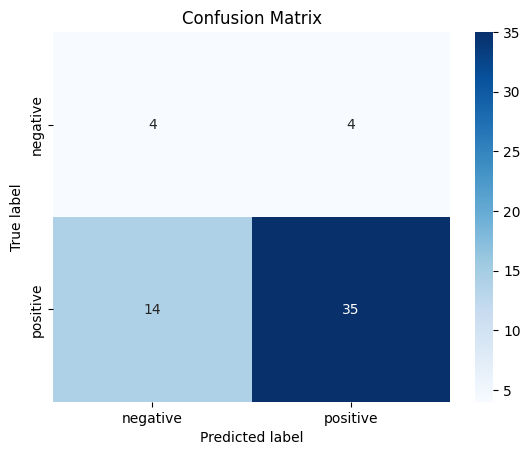

In [7]:
import seaborn as sns

# Get labels for confusion matrix
class_names = validation_generator.class_indices.keys()

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Set plot labels
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Show plot
plt.show()
